<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## **Generate Noisy Data**

In [2]:
def linear_fun(x, alpha, beta):
  return alpha*x+beta

In [3]:
def rational_fun(x, alpha, beta):
  return alpha/(1+beta*x)

In [4]:
alpha = np.random.rand()
beta = np.random.rand()
noise = np.random.normal(0,0.1,101)
print(alpha, beta)

0.9681079805424251 0.8008893268575759


In [5]:
k = [*range(0, 101, 1)]
x = np.array([x/100 for x in k])
y = alpha*x + beta + noise

In [6]:
def objective_linear(params):
  alpha, beta = params
  return np.sum(((alpha*x+beta)-y)**2)

In [7]:
def objective_rational(params):
  alpha, beta = params
  return np.sum(((alpha/(1+x*beta))-y)**2)

**Conjugate Gradient Descent**

Linear Approximant

In [8]:
initial = [0,0]
result = optimize.minimize(fun=objective_linear, x0=initial,method='CG', tol=0.001) 
result

     fun: 0.9889747153995152
     jac: array([-2.60770321e-07,  3.12924385e-07])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 3
    njev: 6
  status: 0
 success: True
       x: array([0.99750515, 0.79986556])

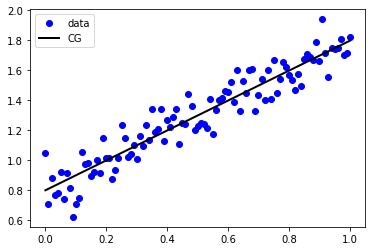

In [9]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result.x[0],result.x[1]), '-k', lw=2, label='CG')
ax.legend()

Rational Approximant



In [10]:
initial = [0,0]
result = optimize.minimize(fun=objective_rational, x0=initial,method='CG', tol=0.001) 
result

     fun: 1.3929830485941523
     jac: array([-2.68101692e-04,  8.36551189e-05])
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 10
    njev: 23
  status: 0
 success: True
       x: array([ 0.92947792, -0.50977282])

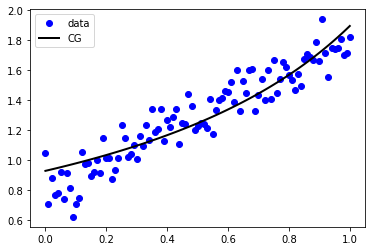

In [11]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result.x[0],result.x[1]), '-k', lw=2, label='CG')
ax.legend()

**Newton's Method**

Linear Approximant

In [12]:
initial = [0,0]
fprime = lambda x: optimize.approx_fprime(x, objective_linear, 0.001)
result = optimize.minimize(fun=objective_linear, x0=initial,method='Newton-CG', tol=0.001, jac=fprime) 
result

     fun: 0.9890080525455668
     jac: array([4.32284808e-06, 3.13108717e-06])
 message: 'Optimization terminated successfully.'
    nfev: 6
    nhev: 0
     nit: 5
    njev: 28
  status: 0
 success: True
       x: array([0.99847576, 0.79888027])

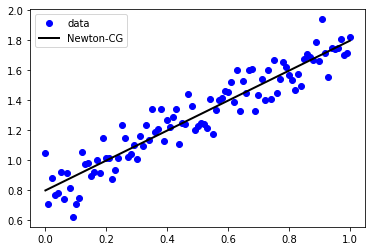

In [13]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result.x[0],result.x[1]), '-k', lw=2, label='Newton-CG')
ax.legend()

Rational Approximant

In [14]:
initial = [0,0]
fprime = lambda x: optimize.approx_fprime(x, objective_rational, 0.001)
result = optimize.minimize(fun=objective_rational, x0=initial,method='Newton-CG', tol=0.001, jac=fprime) 
result

     fun: 1.3929893801615667
     jac: array([0.16254869, 0.33064008])
 message: 'Warning: Desired error not necessarily achieved due to precision loss.'
    nfev: 66
    nhev: 0
     nit: 7
    njev: 90
  status: 2
 success: False
       x: array([ 0.92960448, -0.50952966])

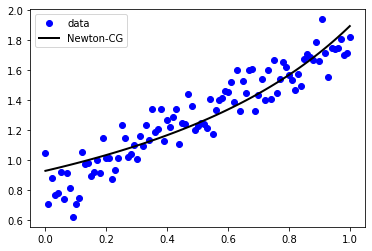

In [15]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result.x[0],result.x[1]), '-k', lw=2, label='Newton-CG')
ax.legend()

**Levenberg-Marquardt algorithm**

Linear Approximant

In [16]:
result = optimize.curve_fit(linear_fun, x, y, method='lm')[0]
result

array([0.99750517, 0.79986556])

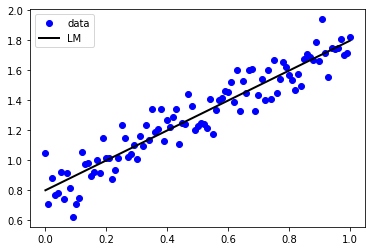

In [17]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result[0],result[1]), '-k', lw=2, label='LM')
ax.legend()

Rational Approximant

In [18]:
result = optimize.curve_fit(rational_fun, x, y, method='lm')[0]
result

array([ 0.92947973, -0.50977161])

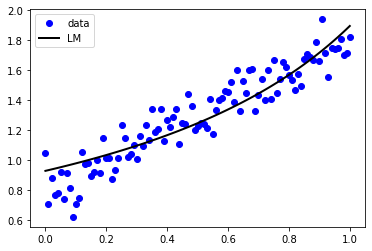

In [19]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result[0],result[1]), '-k', lw=2, label='LM')
ax.legend()

**Gradient Descent**

Linear Approximant

In [20]:
def GradientDescentLinear(x, y, alpha, beta, lr, tol=0.001):
  for i in range(100):
    der_alpha = np.sum(2*x*(alpha*x+beta-y))
    der_beta = np.sum(2*(alpha*x+beta-y))
    alpha = alpha - lr*der_alpha
    beta = beta - lr*der_beta
    if np.abs(lr*der_alpha) < tol and np.abs(lr*der_beta) < tol:
      return alpha, beta, i
  return alpha, beta, i

In [21]:
alpha, beta, iteration = GradientDescentLinear(x, y, 0, 0, 0.001)
print(alpha, beta)

0.8844679794255945 0.8604452106317785


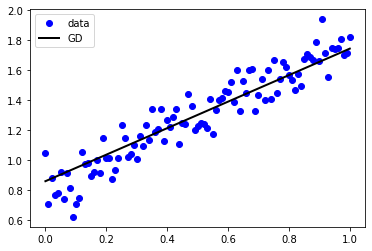

In [22]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, alpha,beta), '-k', lw=2, label='GD')
ax.legend()

Rational Approximant

In [23]:
def GradientDescentRational(x, y, alpha, beta, lr, tol=0.001):
  for i in range(100):
    t = (1 + beta*x)
    der_alpha = np.sum(2*((alpha/t) - y)/t)
    der_beta = np.sum(2*alpha*x*(t*y - alpha)/(t**3))
    alpha = alpha - lr*der_alpha
    beta = beta - lr*der_beta
    if np.abs(lr*der_alpha) < tol and np.abs(lr*der_beta) < tol:
      return alpha, beta, i
  return alpha, beta, i

In [26]:
alpha, beta, iteration = GradientDescentRational(x, y, 0, 0, 0.001)
print(alpha, beta, iteration)

0.9441793420175288 -0.49669762963628733 45


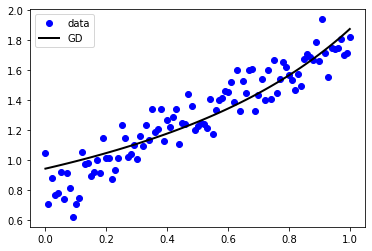

In [27]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, alpha,beta), '-k', lw=2, label='GD')
ax.legend()